# 얼굴 인식
* 얼굴인식(Face Recognition)은 영상에서 특정 사람을 식별하는 과정으로 크게 2가지 프로세스를 거쳐야한다. 
* 먼저 영상에서 얼굴을 검출하는 과정이 필요하고, 다음으로 검출된 얼굴 영상이 누구의 영상인지 식별하는 과정이다.

## 얼굴 검출(Face Detection)
* 아래 코드에서 얼굴 검출을 위해 Multi-task Cascaded CNN 모델을 사용한다. 
* 이 모델은 face detection과face alignment를 동시에 수행하는 Multi-Task모델이다. 

In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        # 프로그램 시작시에 가장 장치가 설정되어야만 합니다
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


[{'box': [108, 119, 178, 267], 'confidence': 0.9975340366363525, 'keypoints': {'left_eye': (151, 228), 'right_eye': (243, 231), 'nose': (195, 287), 'mouth_left': (147, 309), 'mouth_right': (242, 311)}}]


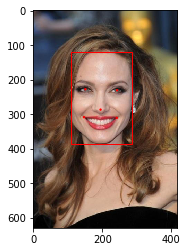

In [3]:
def draw_image_with_boxes(img, result_list):
    # 이미지 그리기
    plt.figure()
    plt.imshow(img)
    
    # 검출 결과를 그리기 위한 plot 컨텍스트 가져오기
    ax = plt.gca()
    
    for result in result_list:
        # 바운드 박스 그리기
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect) 
        
        # face alignment 포인트 그리기
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    plt.show()

img_path = './data/img_celeba/187853.jpg' # 안젤리나 졸리 - test label 5876
img = plt.imread(img_path)
detector = MTCNN()
faces = detector.detect_faces(img)

print(faces)
draw_image_with_boxes(img, faces)